In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw,ImageFont
from ast import literal_eval
import numpy as np
from IPython.display import Video
import cv2
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import warnings
warnings.filterwarnings('ignore')
import glob
from pathlib import Path
import os

In [15]:
query='photo of man, a bicycle, a red car driving ver fast, a traffic light'

In [16]:
#HASNT FINETUNE, MUCH LIKE VANILA, PERFORMANCE WILL SIGNIFICANTLY IMPROVED

Memory used 10.829 GB
done
['a traffic light', 'a bicycle', 'photo of man', 'a red car driving ver fast']


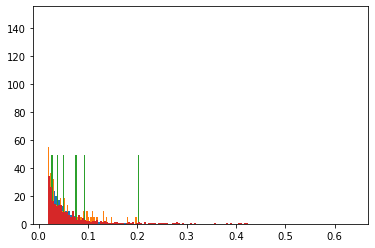

In [17]:
image_path='PATH_TO_YOUR_EXTRACT_VIDEO_FOLDER'
START_DISTANCE=0.0
END_DISTANCE=0.16

query = '"' + query + '"'
image_path = '"' + image_path + '"'
os.system(f'python createVIDEOf.py {image_path} {query} {START_DISTANCE} {END_DISTANCE}')
def plotHistogram(label,lower_limit = 0.0025, limit=0.1,binsize=100):
    ds = df_label.get_group(label)
    ds_scores = ds['score'].to_numpy()
    ds_scores = ds_scores[ds_scores < limit]
    ds_scores = ds_scores[ds_scores >lower_limit]
    return plt.hist(ds_scores,density=True, bins=binsize)
df = pd.read_csv('dvr.csv')
df.sort_values(by='image_path')
df_label = df.groupby('label')
list_of_labels = df['label'].unique().tolist()
print(list_of_labels)
for l in list_of_labels:
    _ = plotHistogram(l,0.02,1)

In [18]:
 #The higher this number the lesss object it will return

cut_off_point = {}
for l in list_of_labels:
    cut_off_point[l] = 0.05

In [20]:
color_dict = {}
for l in list_of_labels:
    color_dict[l] = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
color_dict[list(color_dict.keys())[0]] = 'red'


w,h = Image.open(df['image_path'].values[0]).size
out = cv2.VideoWriter(f'{query}.mp4',cv2.VideoWriter_fourcc(*'MP4V'),1, (w,h))
font = ImageFont.load_default()
for image,g in df.groupby('image_path'):
    contain_label = False
    image = Image.open(image)
    draw = ImageDraw.Draw(image)
    label = g['label'].tolist()
    
    for nn,gg in g.groupby('label'):
        score = gg['score'].tolist()
        box = gg['box'].tolist()
        for b,s in zip(box,score):
            if s > cut_off_point[nn]:
                b = literal_eval(b)
                draw.rectangle(b, outline=color_dict[nn])
                draw.text(b[:2],nn,color_dict[nn])
    i = 0
    draw.rectangle((10,50,140,50+20*len(list_of_labels)),fill='white')
    for l in list_of_labels:
        draw.text((10,50+20*i),l,color_dict[l])
        i += 1
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    out.write(image)
out.release() 

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [1]:
#The above code will create a video